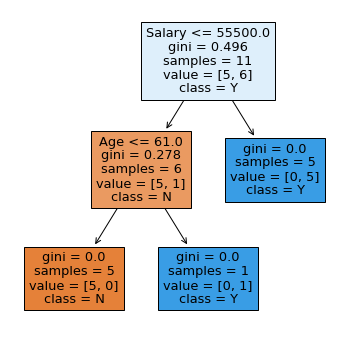

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,\
RepeatedKFold, train_test_split
from sklearn import tree
# Prepare the data data
data = "C:\\Users\\smrit\\Desktop\\spring\\dm\\hw\\Data\\data.csv"
col_names = ['Name', 'Age', 'Salary', 'Donor']
df = pd.read_csv(data,sep = ' ',names=col_names)
del df['Name']
X = df.drop('Donor', axis=1)
y = df['Donor']
df.head()

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=2)
model = clf.fit(X, y)

fig = plt.figure(figsize=(6,6))
_ = tree.plot_tree(clf, 
                   feature_names=['Age', 'Salary'],  
                   class_names=['N','Y'],
                   filled=True)


In [2]:
model=DecisionTreeClassifier()

leave_validation=LeaveOneOut()

results=cross_val_score(model,X,y,cv=leave_validation)

print(results)
print()
print(results.mean())

[1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]

0.6363636363636364


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\\smrit\\Desktop\\spring\\dm\\mushrooms.csv")

df.shape


(8124, 23)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [6]:
#From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.
df=df.drop(["veil-type"],axis=1)

In [7]:
X=df.drop(['class'], axis=1)
Y=df['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

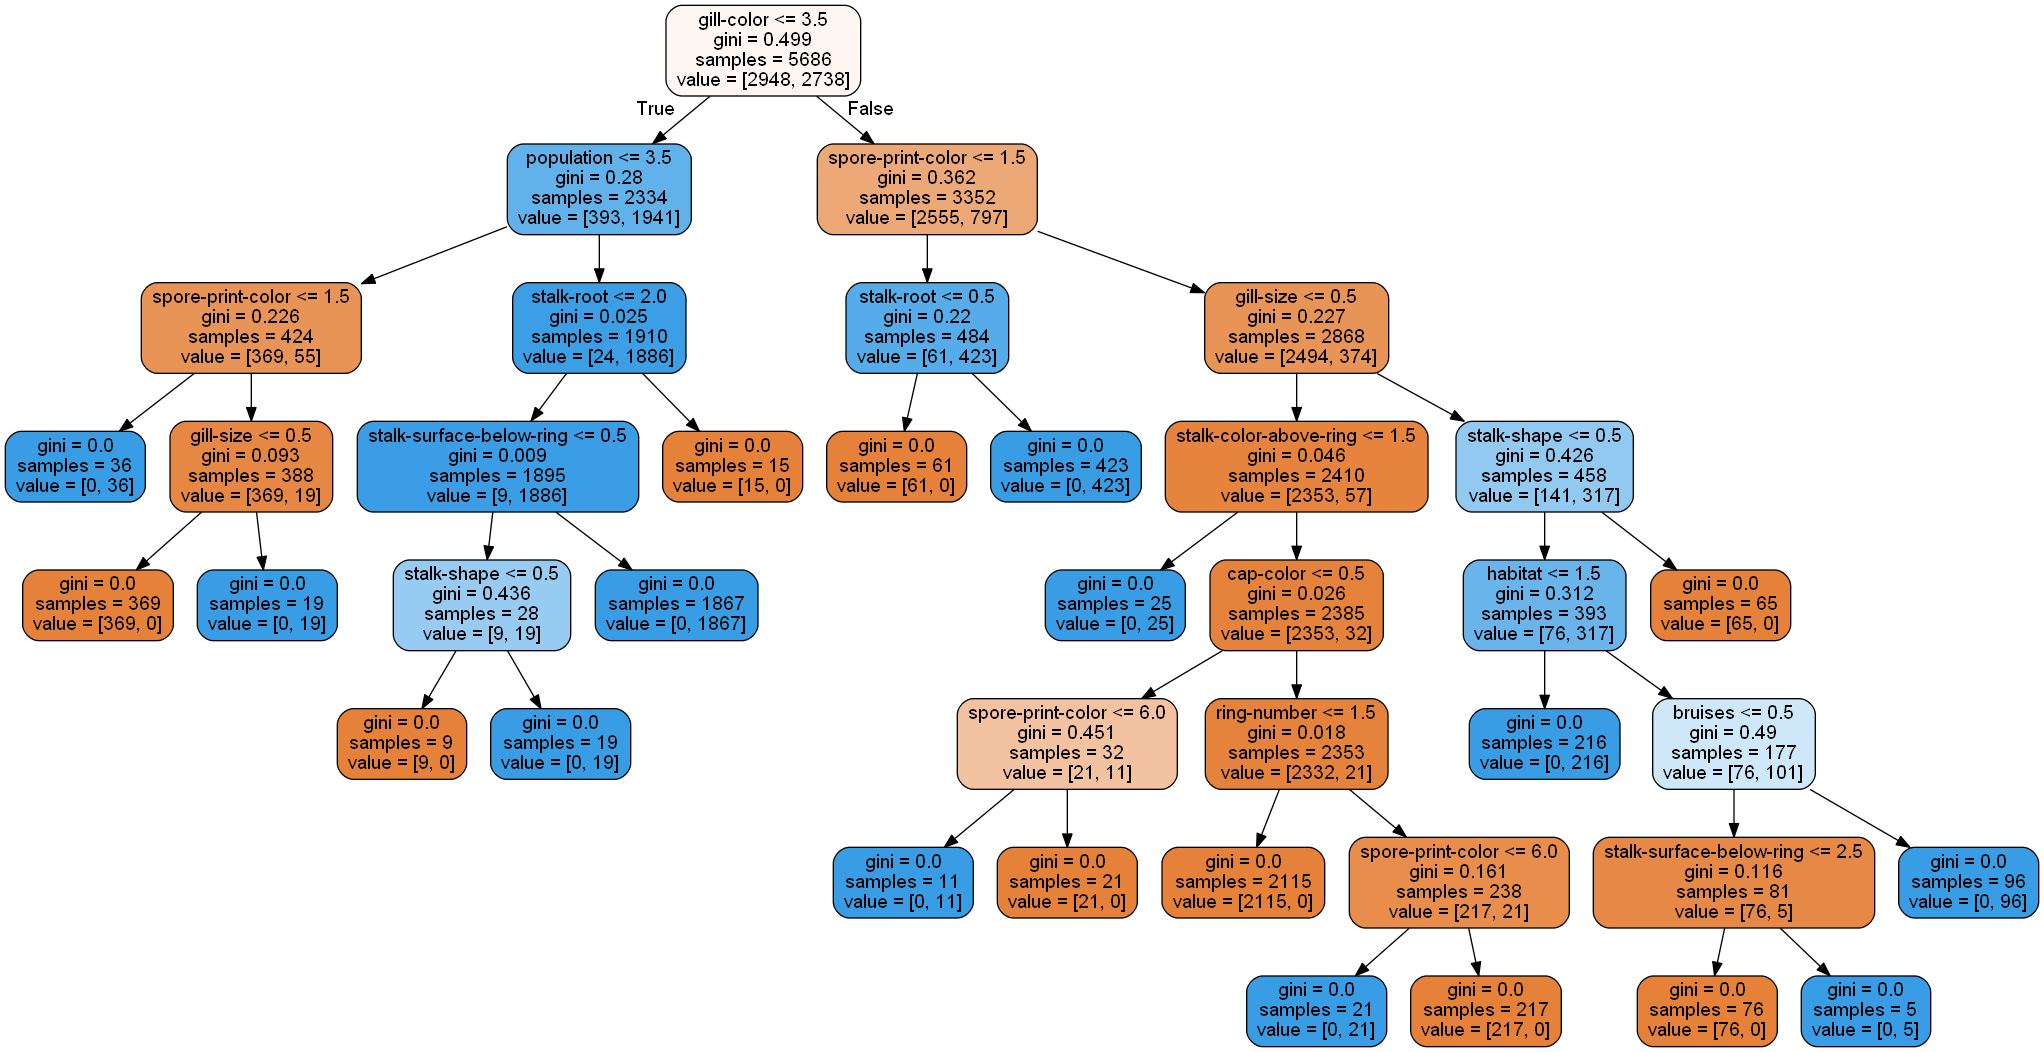

In [21]:
from sklearn import tree
import pydotplus
from IPython.display import Image 

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [11]:
#Evaluate results using 10-fold cross-validation and report your findings.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
model=DecisionTreeClassifier() 
kfold_validation=KFold(10)
results= cross_val_score(model,X, Y,cv=kfold_validation)

print(results)
print()
print(results.mean())

[1.         1.         1.         1.         1.         1.
 0.99261084 1.         1.         1.        ]

0.9992610837438424


In [28]:
print("test size with 500 training example is ",100-((500*100)/8124))
print("test size with 5000 training example is ",100-((5000*100)/8124))

test size with 500 training example is  93.84539635647464
test size with 5000 training example is  38.45396356474643


In [30]:
#Compare test set accuracy when training a mushroom classifier using 500 vs. 5,000 training examples.
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.384,random_state =42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 100.0%


In [29]:
#Compare test set accuracy when training a mushroom classifier using 500 vs. 5,000 training examples.
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.938,random_state =42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 98.87%


In [14]:
#Report accuracy on training and test data when using a decision tree that has 10 leaves
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25,random_state =0)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =0, max_leaf_nodes=10)
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 97.29%


In [15]:
#Report accuracy on training and test data when using a decision tree that has 30 leaves
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25,random_state =0)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =0, max_leaf_nodes=30)
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 100.0%
